## Importar librerías

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de la base de datos

In [4]:
ruta = "../data_ecommerce_customer_churn.csv"

datos = pd.read_csv(ruta)

# Exploracion de Datos

In [5]:
datos.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [6]:
datos.tail()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1
3940,2.0,7.0,3,Laptop & Accessory,5,Married,1,0,2.0,153.73,0


### Exploracion

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [8]:
datos.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [9]:
datos['MaritalStatus'].value_counts()

MaritalStatus
Married     2055
Single      1310
Divorced     576
Name: count, dtype: int64

In [10]:
datos['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1458
Mobile Phone           887
Fashion                585
Mobile                 559
Grocery                273
Others                 179
Name: count, dtype: int64

### Control de valores nulos

No hay valores nulos en el dataset

In [11]:
datos.isnull().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

# Limpieza

### Renombrar variables

In [12]:
datos.rename(columns={
    'Tenure': 'Antiguedad',
    'WarehouseToHome': 'Distancia_Almacen',
    'NumberOfDeviceRegistered': 'Numero_Dispositivos',
    'PreferedOrderCat': 'Categoria_Preferida',
    'SatisfactionScore': 'Nivel_Satisfaccion',
    'MaritalStatus': 'Estado_Civil',
    'NumberOfAddress': 'Numero_Direcciones',
    'Complain': 'Queja',
    'DaySinceLastOrder': 'Dias_Ultima_Compra',
    'CashbackAmount': 'Monto_Cashback',
    'Churn': 'Target'
}, inplace=True)

In [13]:
datos.head()

,Antiguedad,Distancia_Almacen,Numero_Dispositivos,Categoria_Preferida,Nivel_Satisfaccion,Estado_Civil,Numero_Direcciones,Queja,Dias_Ultima_Compra,Monto_Cashback,Target
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


### Cambio de tipo de variable

In [14]:
datos['Estado_Civil'] = datos['Estado_Civil'].astype('string')

In [15]:
datos['Categoria_Preferida'] = datos['Categoria_Preferida'].astype('string')

In [16]:
datos['Estado_Civil'] = datos['Estado_Civil'].str.lower()
datos['Estado_Civil'].value_counts()

Estado_Civil
married     2055
single      1310
divorced     576
Name: count, dtype: Int64

In [17]:
datos['Categoria_Preferida'] = datos['Categoria_Preferida'].str.lower()
datos['Categoria_Preferida'].value_counts()

Categoria_Preferida
laptop & accessory    1458
mobile phone           887
fashion                585
mobile                 559
grocery                273
others                 179
Name: count, dtype: Int64

### Datos Duplicados

In [18]:
datos.duplicated().sum()

np.int64(671)

### Escalado de variables 

### Tratamiento de valores nulos

=== Porcentaje de valores nulos ===
Dias_Ultima_Compra    5.404720
Antiguedad            4.922608
Distancia_Almacen     4.288252
dtype: float64


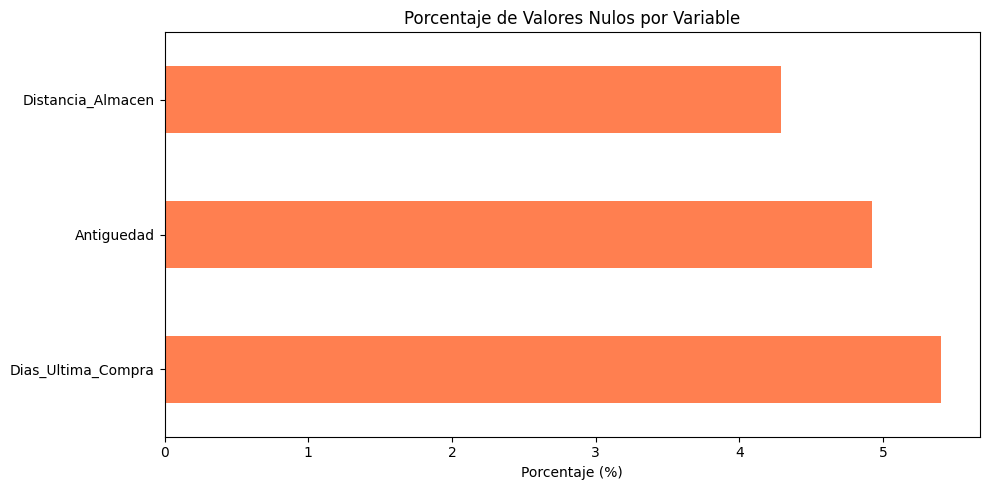

In [19]:
# Análisis de valores nulos por variable y su relación con Churn
print("=== Porcentaje de valores nulos ===")
nulos_porcentaje = (datos.isnull().sum() / len(datos) * 100).sort_values(ascending=False)
print(nulos_porcentaje[nulos_porcentaje > 0])

# Visualización
if nulos_porcentaje[nulos_porcentaje > 0].shape[0] > 0:
    plt.figure(figsize=(10, 5))
    nulos_porcentaje[nulos_porcentaje > 0].plot(kind='barh', color='coral')
    plt.title('Porcentaje de Valores Nulos por Variable')
    plt.xlabel('Porcentaje (%)')
    plt.tight_layout()
    plt.show()

In [20]:
# Imputación de valores nulos
# Para Antiguedad, Distancia_Almacen y Dias_Ultima_Compra usamos la mediana
# ya que son menos sensibles a outliers

if datos['Antiguedad'].isnull().sum() > 0:
    datos['Antiguedad'].fillna(datos['Antiguedad'].median(), inplace=True)
    
if datos['Distancia_Almacen'].isnull().sum() > 0:
    datos['Distancia_Almacen'].fillna(datos['Distancia_Almacen'].median(), inplace=True)
    
if datos['Dias_Ultima_Compra'].isnull().sum() > 0:
    # Para días desde última compra, podríamos usar la mediana o un valor específico
    # que indique "hace mucho tiempo"
    datos['Dias_Ultima_Compra'].fillna(datos['Dias_Ultima_Compra'].median(), inplace=True)

print("\nValores nulos después de imputación:")
print(datos.isnull().sum())


Valores nulos después de imputación:
Antiguedad             0
Distancia_Almacen      0
Numero_Dispositivos    0
Categoria_Preferida    0
Nivel_Satisfaccion     0
Estado_Civil           0
Numero_Direcciones     0
Queja                  0
Dias_Ultima_Compra     0
Monto_Cashback         0
Target                 0
dtype: int64


C:\Users\etien\AppData\Local\Temp\ipykernel_4484\2341299891.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos['Antiguedad'].fillna(datos['Antiguedad'].median(), inplace=True)
C:\Users\etien\AppData\Local\Temp\ipykernel_4484\2341299891.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [21]:
datos['Queja'] = datos['Queja'].astype(int)
datos.head()

,Antiguedad,Distancia_Almacen,Numero_Dispositivos,Categoria_Preferida,Nivel_Satisfaccion,Estado_Civil,Numero_Direcciones,Queja,Dias_Ultima_Compra,Monto_Cashback,Target
0,15.0,29.0,4,laptop & accessory,3,single,2,0,7.0,143.32,0
1,7.0,25.0,4,mobile,1,married,2,0,7.0,129.29,0
2,27.0,13.0,3,laptop & accessory,1,married,5,0,7.0,168.54,0
3,20.0,25.0,4,fashion,3,divorced,7,0,3.0,230.27,0
4,30.0,15.0,4,others,4,single,8,0,8.0,322.17,0


In [22]:
datos['Target'] = datos['Target'].astype(int)
datos.head()

,Antiguedad,Distancia_Almacen,Numero_Dispositivos,Categoria_Preferida,Nivel_Satisfaccion,Estado_Civil,Numero_Direcciones,Queja,Dias_Ultima_Compra,Monto_Cashback,Target
0,15.0,29.0,4,laptop & accessory,3,single,2,0,7.0,143.32,0
1,7.0,25.0,4,mobile,1,married,2,0,7.0,129.29,0
2,27.0,13.0,3,laptop & accessory,1,married,5,0,7.0,168.54,0
3,20.0,25.0,4,fashion,3,divorced,7,0,3.0,230.27,0
4,30.0,15.0,4,others,4,single,8,0,8.0,322.17,0


In [23]:
datos.describe()

,Antiguedad,Distancia_Almacen,Numero_Dispositivos,Nivel_Satisfaccion,Numero_Direcciones,Queja,Dias_Ultima_Compra,Monto_Cashback,Target
count,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000
mean,10.028165,15.579802,3.679269,3.088302,4.237757,0.282416,4.448871,176.707419,0.171023
std,8.290290,8.275800,1.013938,1.381832,2.626699,0.450232,3.583909,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,15.000000,20.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


# Guardado del dataset

In [24]:
ruta_guardado = "../datos/dataset_ecommerce_limpio.csv"
datos.to_csv(ruta_guardado, index=False)

# Analisis Univariado

### Selección de variables relevantes de comportamiento

In [25]:
variables_comportamiento = [
    "Antiguedad",
    "Distancia_Almacen",
    "Numero_Dispositivos",
    "Nivel_Satisfaccion",
    "Numero_Direcciones",
    "Queja",
    "Dias_Ultima_Compra",
    "Monto_Cashback",
    "Target"
]

## Matriz de correlación

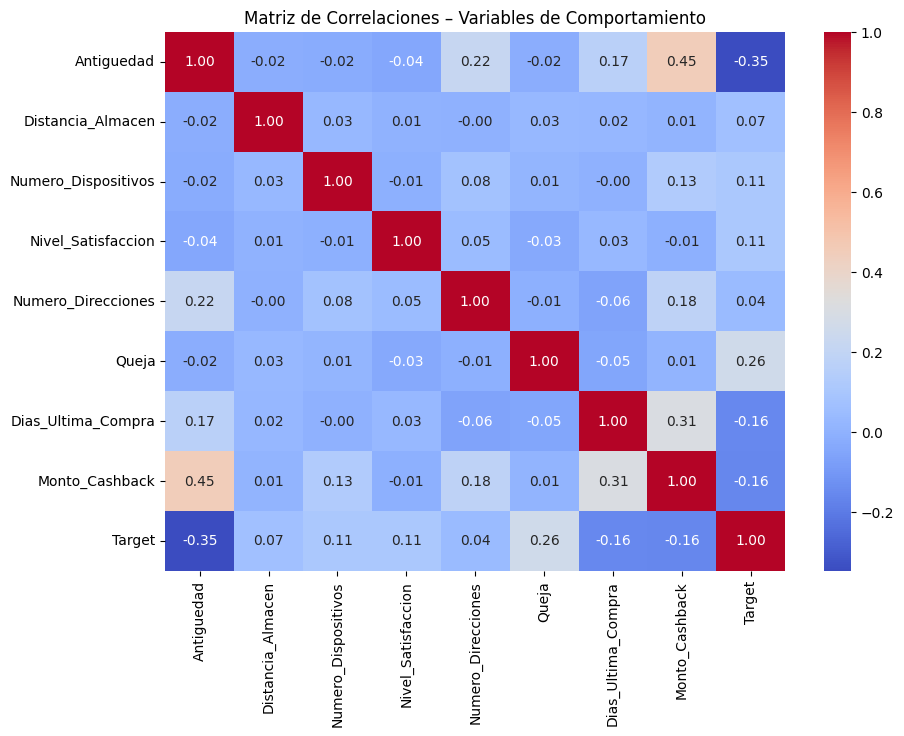

,Antiguedad,Distancia_Almacen,Numero_Dispositivos,Nivel_Satisfaccion,Numero_Direcciones,Queja,Dias_Ultima_Compra,Monto_Cashback,Target
Antiguedad,1.000000,-0.019175,-0.022265,-0.042268,0.221866,-0.017975,0.167483,0.453206,-0.345922
Distancia_Almacen,-0.019175,1.000000,0.029336,0.006175,-0.002105,0.029950,0.022517,0.009719,0.066391
Numero_Dispositivos,-0.022265,0.029336,1.000000,-0.005504,0.077813,0.013885,-0.001580,0.128373,0.108464
Nivel_Satisfaccion,-0.042268,0.006175,-0.005504,1.000000,0.047638,-0.033975,0.031252,-0.006496,0.107541
Numero_Direcciones,0.221866,-0.002105,0.077813,0.047638,1.000000,-0.005070,-0.061918,0.182821,0.039195
Queja,-0.017975,0.029950,0.013885,-0.033975,-0.005070,1.000000,-0.047124,0.010934,0.261450
Dias_Ultima_Compra,0.167483,0.022517,-0.001580,0.031252,-0.061918,-0.047124,1.000000,0.311210,-0.156002
Monto_Cashback,0.453206,0.009719,0.128373,-0.006496,0.182821,0.010934,0.311210,1.000000,-0.161535
Target,-0.345922,0.066391,0.108464,0.107541,0.039195,0.261450,-0.156002,-0.161535,1.000000


In [26]:
corr = datos[variables_comportamiento].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlaciones – Variables de Comportamiento")
plt.show()

corr


## Separar variables numéricas y categóricas del subset de comportamiento

In [27]:
datos_comportamiento = datos[variables_comportamiento]

numericas = datos_comportamiento.select_dtypes(include=['int64', 'float64'])
categoricas = datos_comportamiento.select_dtypes(include=['object', 'string'])

print("Variables numéricas de comportamiento:", numericas.columns.tolist())
print("Variables categóricas de comportamiento:", categoricas.columns.tolist())

Variables numéricas de comportamiento: ['Antiguedad', 'Distancia_Almacen', 'Numero_Dispositivos', 'Nivel_Satisfaccion', 'Numero_Direcciones', 'Queja', 'Dias_Ultima_Compra', 'Monto_Cashback', 'Target']
Variables categóricas de comportamiento: []


## Histogramas para variables numéricas

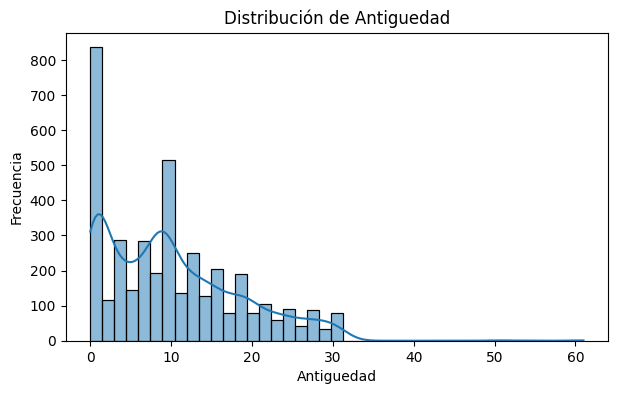

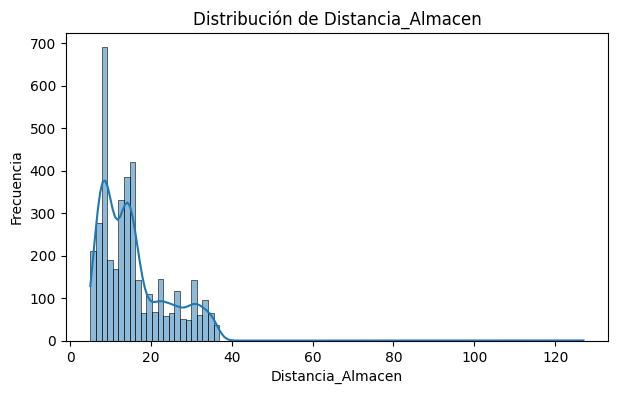

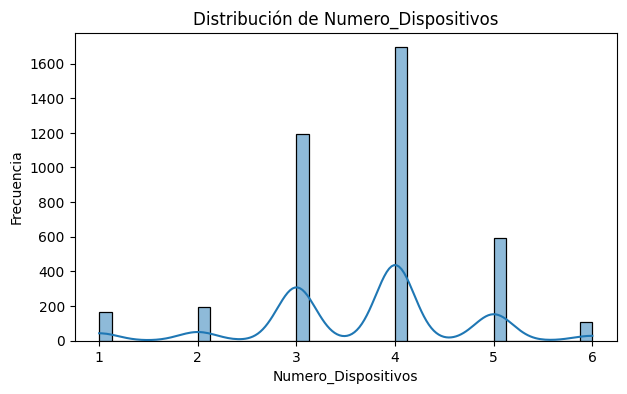

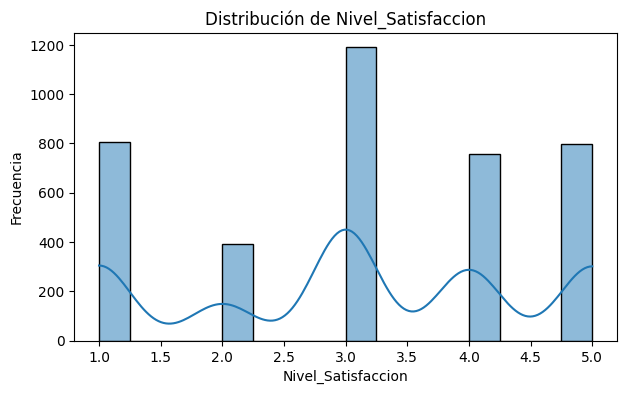

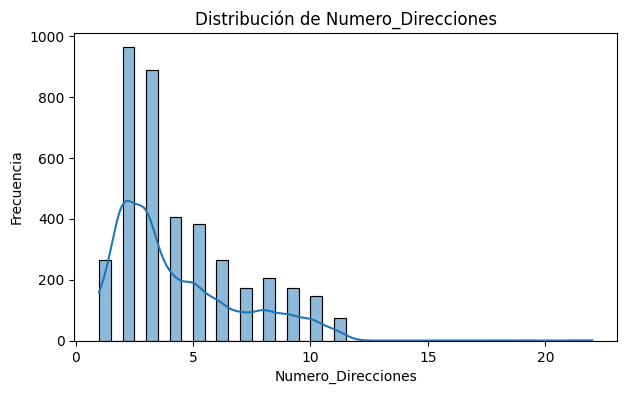

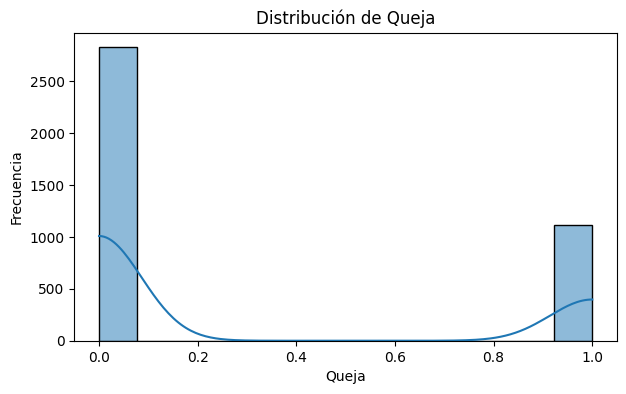

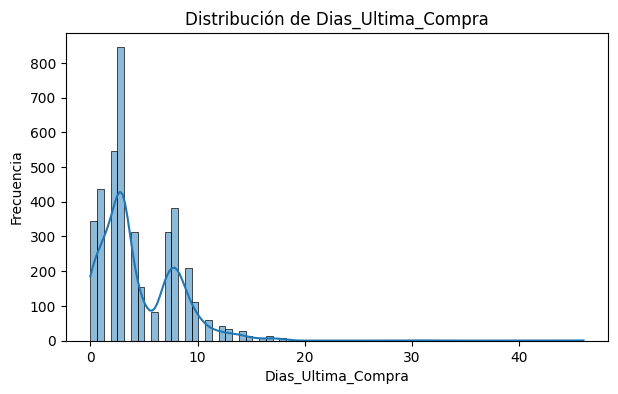

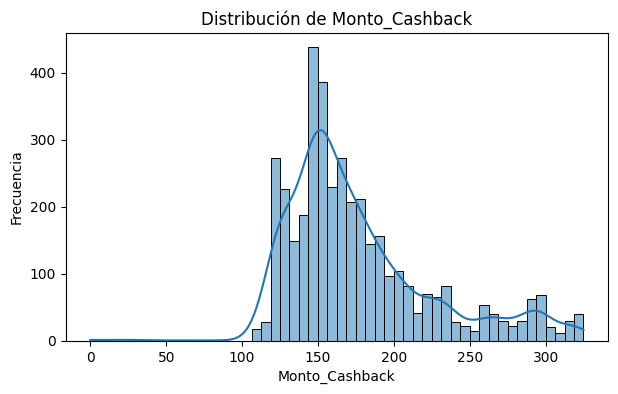

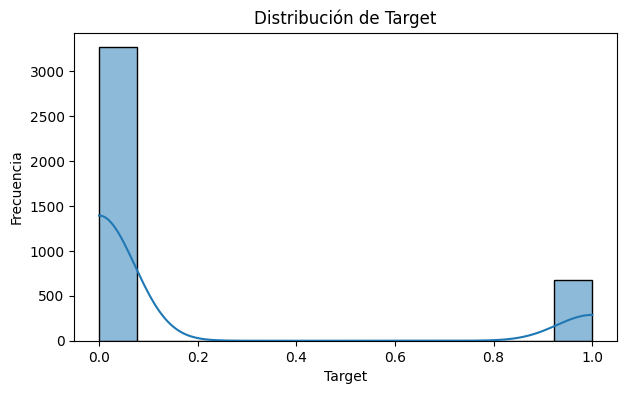

In [28]:
for col in numericas.columns:
    plt.figure(figsize=(7,4))
    sns.histplot(datos_comportamiento[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()


## Boxplots para identificar outliers

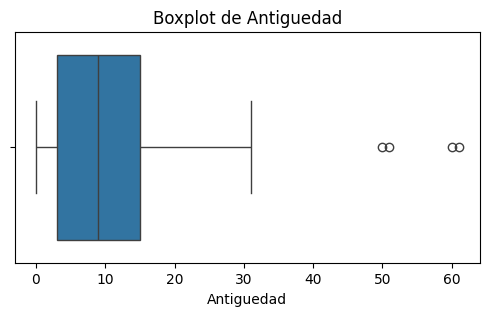

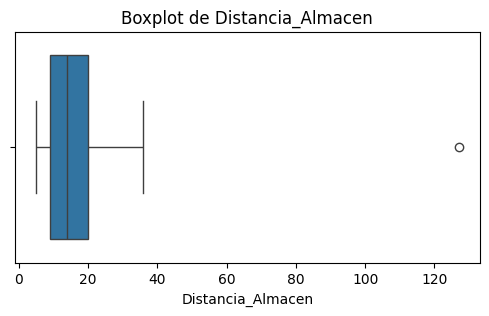

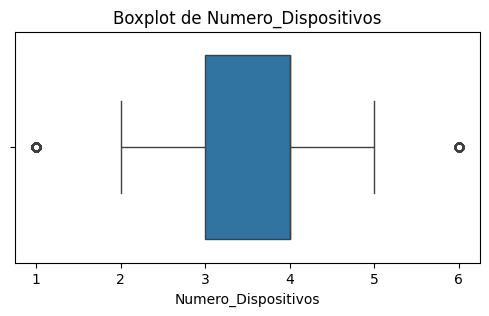

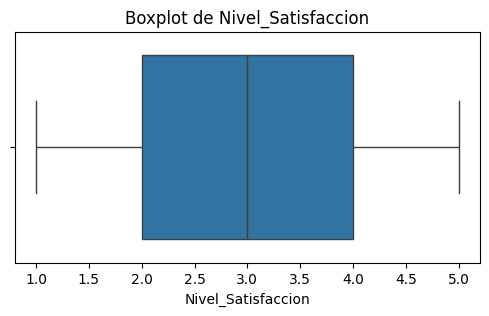

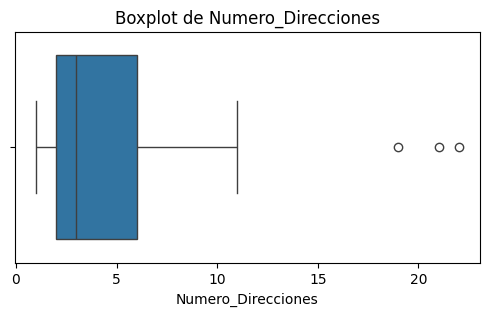

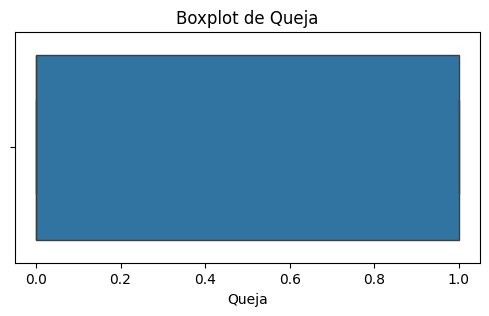

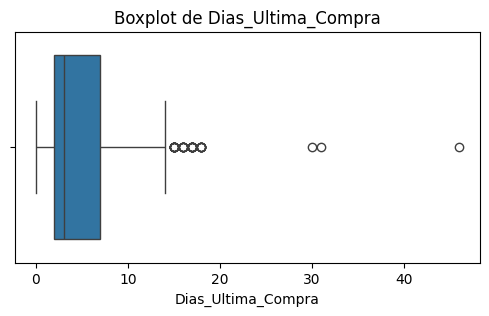

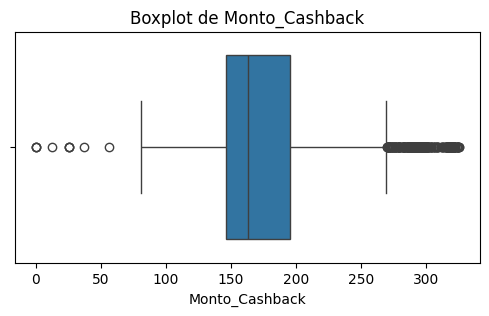

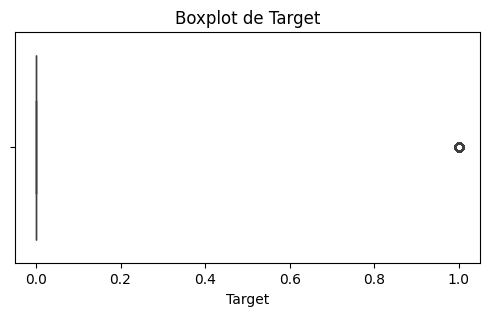

In [29]:
for col in numericas.columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=datos_comportamiento[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

## Respuesta_a_Promocion

C:\Users\etien\AppData\Local\Temp\ipykernel_4484\48353059.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Categoria_Preferida', data=datos, palette='viridis')


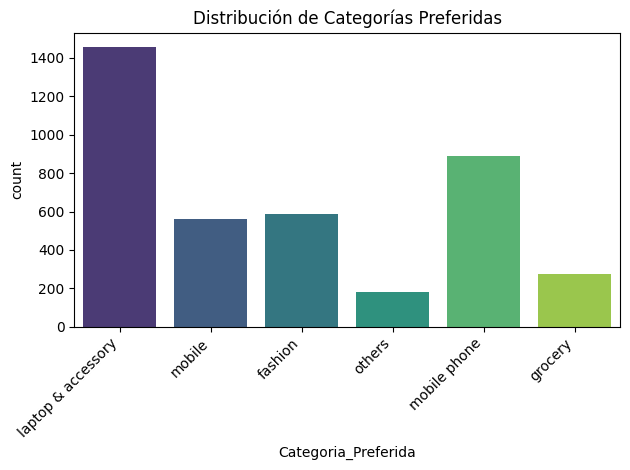

In [30]:
sns.countplot(x='Categoria_Preferida', data=datos, palette='viridis')
plt.title("Distribución de Categorías Preferidas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Estado Civil

C:\Users\etien\AppData\Local\Temp\ipykernel_4484\451765546.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Estado_Civil', data=datos, palette='Set2')


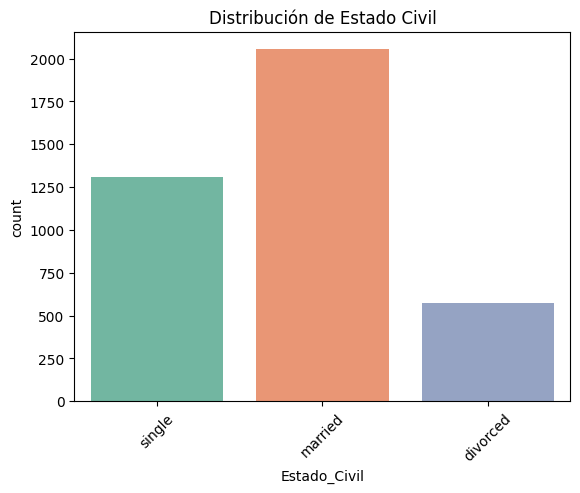

In [31]:
sns.countplot(x='Estado_Civil', data=datos, palette='Set2')
plt.title("Distribución de Estado Civil")
plt.xticks(rotation=45)
plt.show()

# Análisis Bivariado

## Relación entre Churn y variables categóricas

C:\Users\etien\AppData\Local\Temp\ipykernel_4484\505967254.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=datos, palette='coolwarm', ax=ax[0])


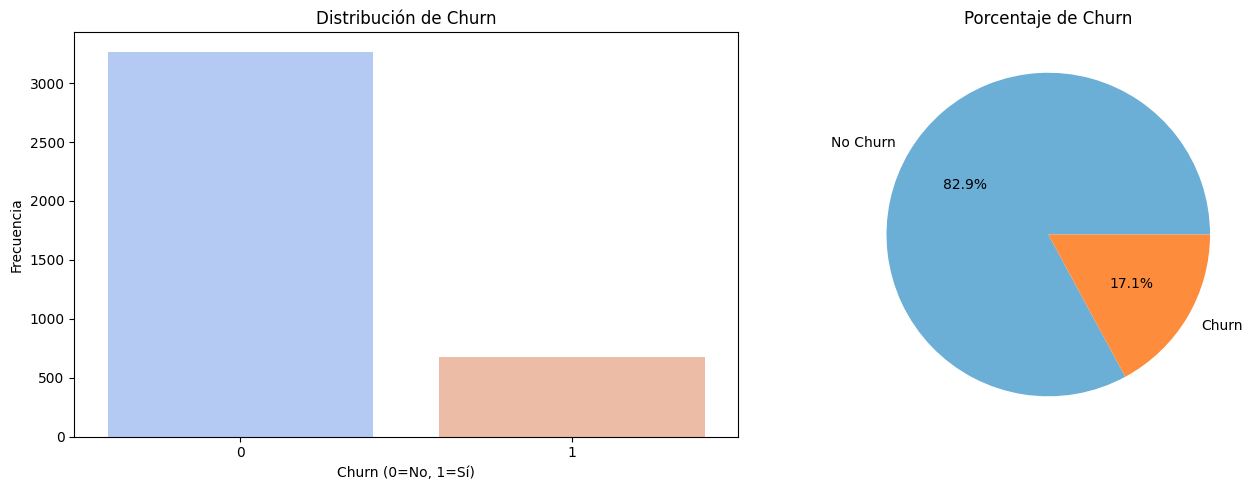

Clientes que abandonan: 674 (17.10%)
Clientes que permanecen: 3267 (82.90%)


In [32]:
# Distribución de Churn
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Countplot de Target
sns.countplot(x='Target', data=datos, palette='coolwarm', ax=ax[0])
ax[0].set_title("Distribución de Churn")
ax[0].set_xlabel("Churn (0=No, 1=Sí)")
ax[0].set_ylabel("Frecuencia")

# Porcentaje de Churn
churn_counts = datos['Target'].value_counts()
ax[1].pie(churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%', colors=['#6baed6', '#fd8d3c'])
ax[1].set_title("Porcentaje de Churn")

plt.tight_layout()
plt.show()

print(f"Clientes que abandonan: {churn_counts[1]} ({churn_counts[1]/len(datos)*100:.2f}%)")
print(f"Clientes que permanecen: {churn_counts[0]} ({churn_counts[0]/len(datos)*100:.2f}%)")

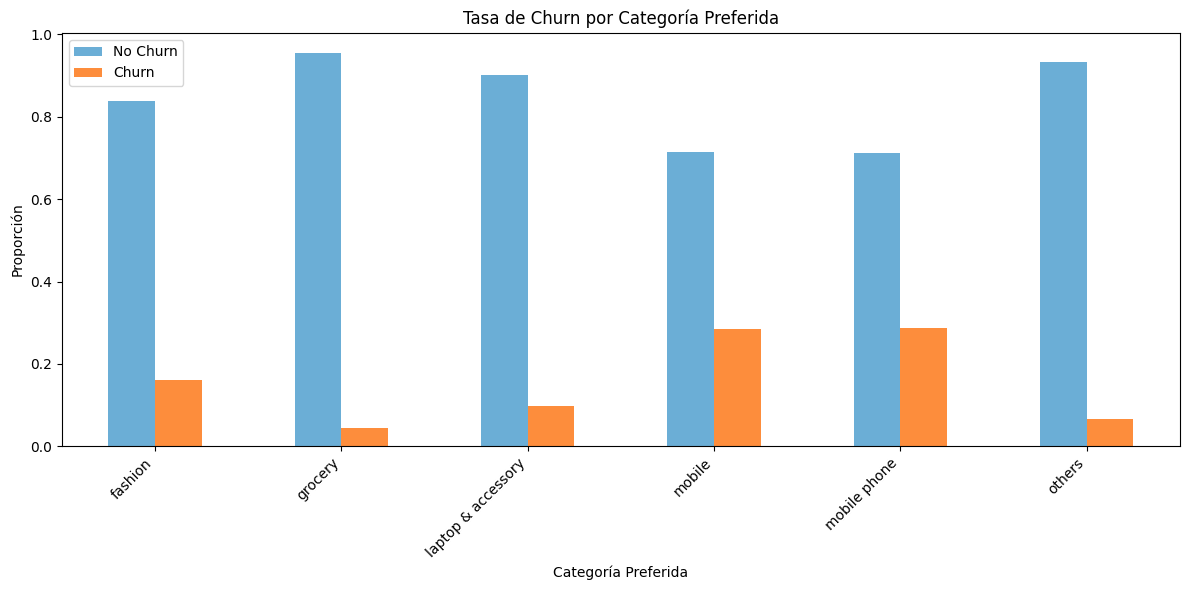

In [33]:
# Churn por Categoría Preferida
fig, ax = plt.subplots(figsize=(12, 6))
pd.crosstab(datos['Categoria_Preferida'], datos['Target'], normalize='index').plot(
    kind='bar', stacked=False, ax=ax, color=['#6baed6', '#fd8d3c']
)
plt.title("Tasa de Churn por Categoría Preferida")
plt.xlabel("Categoría Preferida")
plt.ylabel("Proporción")
plt.xticks(rotation=45, ha='right')
plt.legend(['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

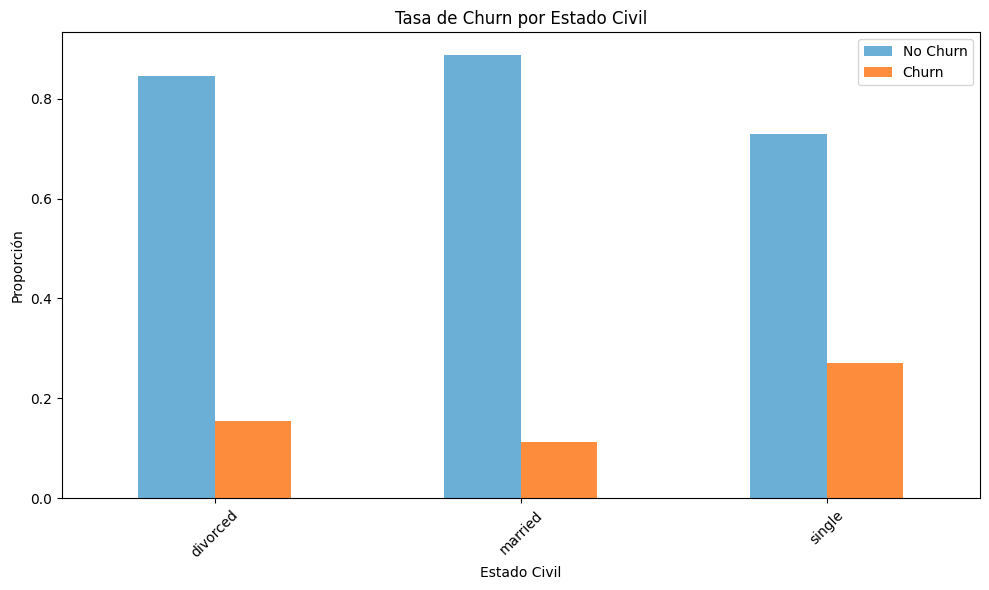

In [34]:
# Churn por Estado Civil
fig, ax = plt.subplots(figsize=(10, 6))
pd.crosstab(datos['Estado_Civil'], datos['Target'], normalize='index').plot(
    kind='bar', stacked=False, ax=ax, color=['#6baed6', '#fd8d3c']
)
plt.title("Tasa de Churn por Estado Civil")
plt.xlabel("Estado Civil")
plt.ylabel("Proporción")
plt.xticks(rotation=45)
plt.legend(['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

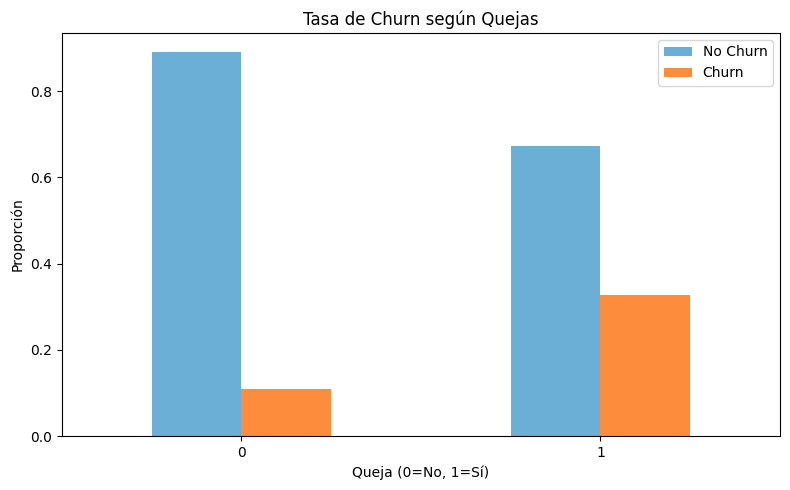

Distribución de quejas:
Target         0         1
Queja                     
0       0.890736  0.109264
1       0.672058  0.327942


In [35]:
# Impacto de Quejas en Churn
fig, ax = plt.subplots(figsize=(8, 5))
pd.crosstab(datos['Queja'], datos['Target'], normalize='index').plot(
    kind='bar', stacked=False, ax=ax, color=['#6baed6', '#fd8d3c']
)
plt.title("Tasa de Churn según Quejas")
plt.xlabel("Queja (0=No, 1=Sí)")
plt.ylabel("Proporción")
plt.xticks(rotation=0)
plt.legend(['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

# Estadísticas
print("Distribución de quejas:")
print(datos.groupby('Queja')['Target'].value_counts(normalize=True).unstack())

## Relación entre Churn y variables numéricas

C:\Users\etien\AppData\Local\Temp\ipykernel_4484\4025368519.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=var, data=datos, palette='coolwarm', ax=axes[i])
C:\Users\etien\AppData\Local\Temp\ipykernel_4484\4025368519.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=var, data=datos, palette='coolwarm', ax=axes[i])
C:\Users\etien\AppData\Local\Temp\ipykernel_4484\4025368519.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=var, data=datos, palette='coolwarm', ax=axes[i])
C:\Users\etien\AppData

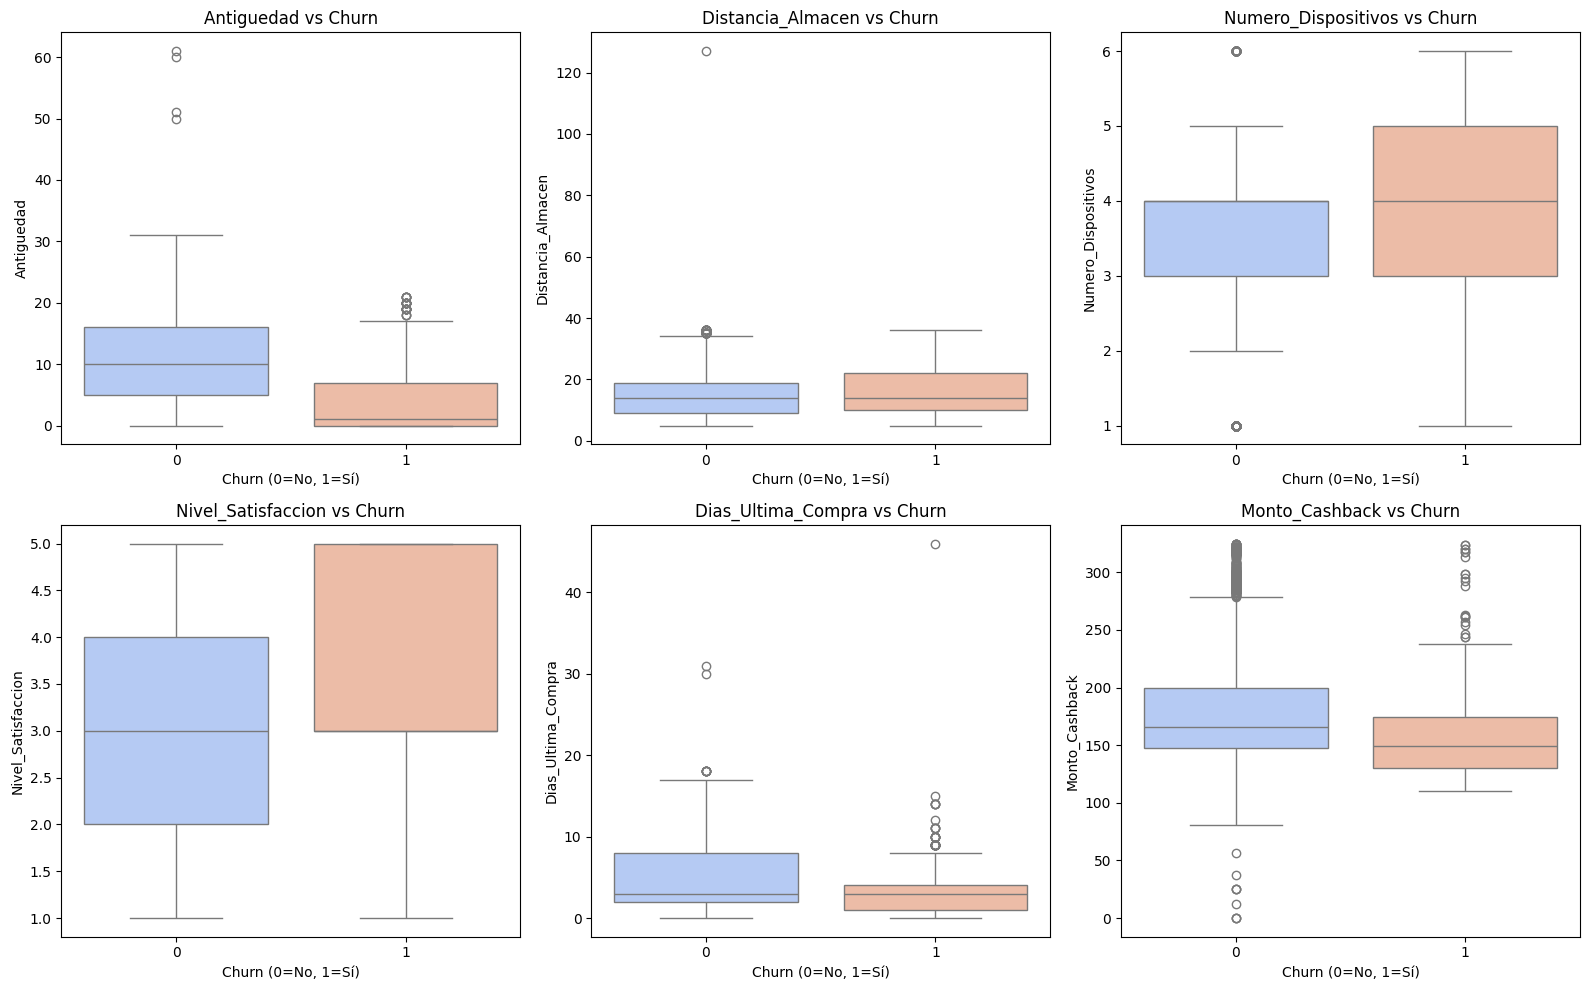

In [36]:
# Comparación de variables numéricas según Churn
variables_numericas = ['Antiguedad', 'Distancia_Almacen', 'Numero_Dispositivos', 
                       'Nivel_Satisfaccion', 'Dias_Ultima_Compra', 'Monto_Cashback']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, var in enumerate(variables_numericas):
    sns.boxplot(x='Target', y=var, data=datos, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f'{var} vs Churn')
    axes[i].set_xlabel('Churn (0=No, 1=Sí)')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

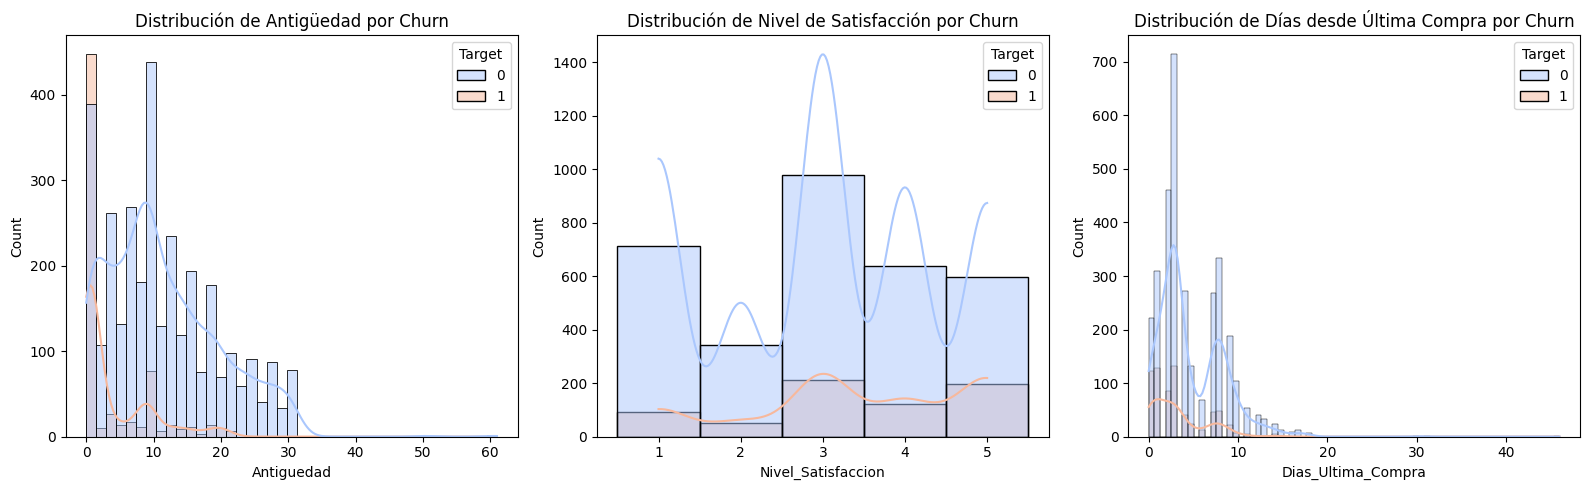

In [37]:
# Distribuciones superpuestas para variables clave
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Antiguedad
sns.histplot(data=datos, x='Antiguedad', hue='Target', kde=True, ax=axes[0], palette='coolwarm')
axes[0].set_title('Distribución de Antigüedad por Churn')

# Nivel de Satisfacción
sns.histplot(data=datos, x='Nivel_Satisfaccion', hue='Target', kde=True, ax=axes[1], palette='coolwarm', discrete=True)
axes[1].set_title('Distribución de Nivel de Satisfacción por Churn')

# Días desde última compra
sns.histplot(data=datos, x='Dias_Ultima_Compra', hue='Target', kde=True, ax=axes[2], palette='coolwarm')
axes[2].set_title('Distribución de Días desde Última Compra por Churn')

plt.tight_layout()
plt.show()

In [38]:
# Estadísticas descriptivas por grupo de Churn
print("=== Estadísticas por grupo de Churn ===\n")
for var in variables_numericas:
    print(f"\n{var}:")
    print(datos.groupby('Target')[var].describe())

=== Estadísticas por grupo de Churn ===


Antiguedad:
         count       mean       std  min  25%   50%   75%   max
Target                                                         
0       3267.0  11.330579  8.193671  0.0  5.0  10.0  16.0  61.0
1        674.0   3.715134  5.330295  0.0  0.0   1.0   7.0  21.0

Distancia_Almacen:
         count       mean       std  min   25%   50%   75%    max
Target                                                           
0       3267.0  15.330272  8.244366  5.0   9.0  14.0  19.0  127.0
1        674.0  16.789318  8.327266  5.0  10.0  14.0  22.0   36.0

Numero_Dispositivos:
         count      mean       std  min  25%  50%  75%  max
Target                                                     
0       3267.0  3.629324  1.009767  1.0  3.0  4.0  4.0  6.0
1        674.0  3.921365  0.999875  1.0  3.0  4.0  5.0  6.0

Nivel_Satisfaccion:
         count      mean       std  min  25%  50%  75%  max
Target                                                     
0  

# Insights y Conclusiones del EDA

=== Correlaciones con Churn (Target) ===
Target                 1.000000
Queja                  0.261450
Numero_Dispositivos    0.108464
Nivel_Satisfaccion     0.107541
Distancia_Almacen      0.066391
Numero_Direcciones     0.039195
Dias_Ultima_Compra    -0.156002
Monto_Cashback        -0.161535
Antiguedad            -0.345922
Name: Target, dtype: float64


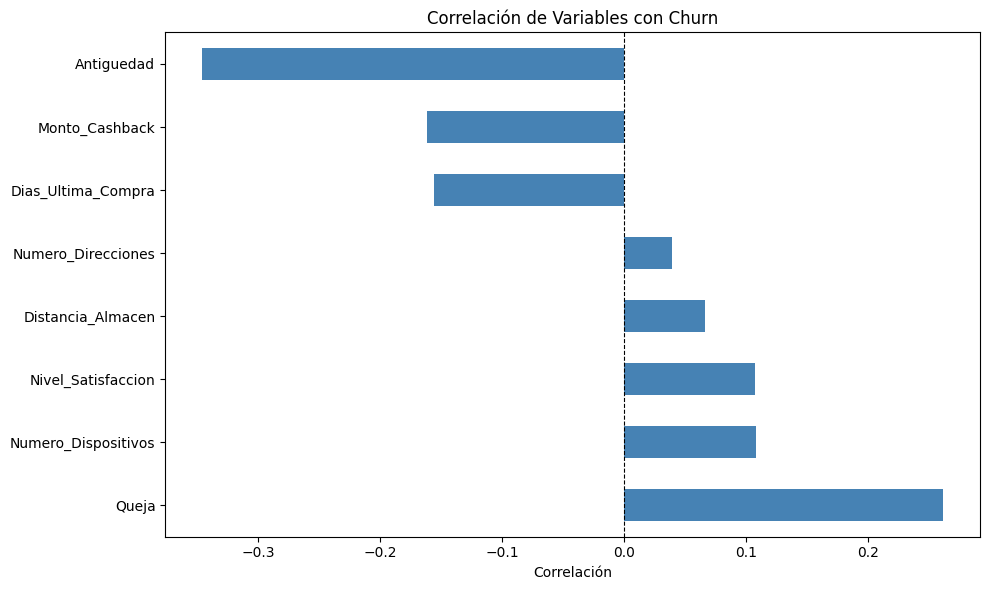

In [39]:
# Resumen de correlaciones con Target
correlaciones_target = datos[variables_comportamiento].corr()['Target'].sort_values(ascending=False)
print("=== Correlaciones con Churn (Target) ===")
print(correlaciones_target)

# Visualización
plt.figure(figsize=(10, 6))
correlaciones_target.drop('Target').plot(kind='barh', color='steelblue')
plt.title('Correlación de Variables con Churn')
plt.xlabel('Correlación')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

## Principales Hallazgos

### Variables más correlacionadas con Churn:
1. **Queja**: Los clientes que presentan quejas tienen mayor probabilidad de abandonar
2. **Antigüedad**: Clientes nuevos (baja antigüedad) tienen mayor riesgo de churn
3. **Días desde última compra**: Mayor tiempo sin comprar aumenta el riesgo
4. **Nivel de Satisfacción**: Menor satisfacción está asociada con mayor churn

### Recomendaciones para el modelo:
- Priorizar variables: Queja, Antigüedad, Nivel_Satisfaccion, Dias_Ultima_Compra
- Considerar ingeniería de features con Categoria_Preferida y Estado_Civil
- Tratar valores nulos en Dias_Ultima_Compra, Antiguedad y Distancia_Almacen
- Evaluar balanceo de clases para Target
- Analizar interacciones entre Queja y otras variables de satisfacción